In [1]:
import pandas as pd
import numpy as np
import gensim
from helpers import lemmatize_stemming, preprocess, compute_coherence_values


filenames = !ls data/unzipped
filenames = [ 'data/unzipped/'+filename for filename in filenames ]

import random
indeces = random.sample(range(len(filenames)), 50)
# indeces = [68]

/home/adrien/twitter-analysis/nlpenv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
from helpers import load_tweets

documents = load_tweets(np.array(filenames)[indeces])

print(len(documents)) # 32586
print(documents[:5])

32684
['We have put together a list of resources to get practical support and advice to stay safe during the coronavirus crises. Find out more ⬇️ \nhttps://t.co/ZhDWbEQhib', 'In a feature for the @lawsocgazette, solicitors write on their experience of life during the #Coronavirus (COVID-19) lockdown 👇\nhttps://t.co/oyFcuGCDlY', 'New piece from Dr. Erik Fromme of Ariadne Labs’ Serious Illness Care Program on the importance of discussing how COVID-19 could affect those with serious illnesses. \n\n‘The hard truth about coronavirus for people living with a serious illness’ → https://t.co/zmcxXfzVo1 https://t.co/6jgU7YPJpP', 'Experimental Coronavirus Drug Remdesivir Expected To Get Emergency FDA A... https://t.co/umu9TlUnEq via @YouTube', '"Coronavirus: Considering Our Responses And Responsibilities (WEEK 8)" held online starting Wed 6th May https://t.co/yfDv6moKia @Diamondleaf_Tr']


In [3]:
processed_docs = [ preprocess(doc) for doc in documents ]
processed_docs[4]

['coronavirus',
 'consid',
 'respons',
 'week',
 'hold',
 'onlin',
 'start',
 'https',
 'yfdv',
 'mokia',
 'diamondleaf_tr']

In [4]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(list(dictionary.items())[:10])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
len([t for t in bow_corpus if t])

[(0, 'advic'), (1, 'coronavirus'), (2, 'crise'), (3, 'https'), (4, 'list'), (5, 'practic'), (6, 'resourc'), (7, 'safe'), (8, 'stay'), (9, 'support')]


32586

In [5]:
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

[doc for doc in corpus_tfidf][:5]

[[(0, 0.3655139230619307),
  (1, 0.4859410332684794),
  (2, 0.3565149061881188),
  (3, 0.37370021905904016),
  (4, 0.37315817646693905),
  (5, 0.29343134364395546),
  (6, 0.2633987142365686),
  (7, 0.2622561561077948)],
 [(8, 0.16441654870474387),
  (9, 0.46980560807166455),
  (10, 0.5554435805612012),
  (11, 0.4048148384433205),
  (12, 0.2667109113449742),
  (13, 0.4568616358323691)],
 [(8, 0.0730452489954904),
  (14, 0.19590012148200506),
  (15, 0.15838716343898354),
  (16, 0.20397389267785004),
  (17, 0.19991625450219527),
  (18, 0.751520285900519),
  (19, 0.18821862557865682),
  (20, 0.2617581563521901),
  (21, 0.13360913112251252),
  (22, 0.10597633479838572),
  (23, 0.22810403470656113),
  (24, 0.22386652392214904),
  (25, 0.22287396564271286)],
 [(26, 0.3674498028275094),
  (27, 0.33630173422279436),
  (28, 0.4248336059994156),
  (29, 0.5051272514014242),
  (30, 0.3971097221022347),
  (31, 0.39818151850359285)],
 [(32, 0.4981725812977013),
  (33, 0.4385098018190923),
  (34, 0.44

In [6]:
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=10, workers=4, alpha=0.01, eta=.91)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.005*"covid" + 0.005*"pandem" + 0.005*"year" + 0.004*"like" + 0.003*"test" + 0.003*"chang" + 0.003*"work" + 0.003*"releas" + 0.003*"high" + 0.003*"lockdown"
Topic: 1 
Words: 0.006*"lockdown" + 0.005*"mask" + 0.005*"state" + 0.004*"stay" + 0.004*"reopen" + 0.004*"busi" + 0.004*"order" + 0.004*"covid" + 0.004*"home" + 0.004*"extend"
Topic: 2 
Words: 0.010*"trump" + 0.008*"remdesivir" + 0.008*"drug" + 0.007*"emerg" + 0.006*"hous" + 0.005*"patient" + 0.005*"realdonaldtrump" + 0.005*"white" + 0.004*"treat" + 0.004*"fauci"
Topic: 3 
Words: 0.004*"worker" + 0.004*"covid" + 0.004*"plant" + 0.004*"food" + 0.003*"pandem" + 0.003*"test" + 0.003*"posit" + 0.003*"meat" + 0.003*"time" + 0.003*"crisi"
Topic: 4 
Words: 0.008*"evid" + 0.006*"trump" + 0.006*"see" + 0.005*"chines" + 0.005*"wuhan" + 0.004*"origin" + 0.004*"claim" + 0.004*"say" + 0.003*"intellig" + 0.003*"come"
Topic: 5 
Words: 0.004*"pandem" + 0.004*"peopl" + 0.004*"work" + 0.004*"time" + 0.004*"covid" + 0.004*"long" + 0

In [7]:
coh_dict = {}
for measure in ['c_npmi', 'c_uci', 'c_v', 'u_mass']:
    model_results = [] 
    for num_topics in range(2, 40, 2):
        print(num_topics)
        cv = compute_coherence_values(corpus=corpus_tfidf, dictionary=dictionary, k=num_topics, coherence=measure, texts=processed_docs)#, a=a, b=b)
        model_results.append(cv)
    coh_dict[measure] = model_results

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


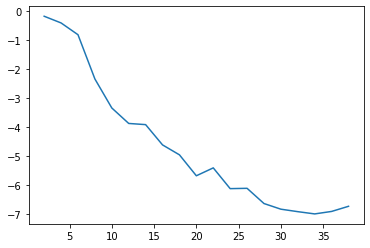

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(2, 40, 2), coh_dict['c_uci'])

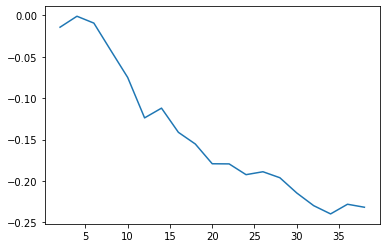

In [9]:
plt.plot(range(2, 40, 2), coh_dict['c_npmi'])


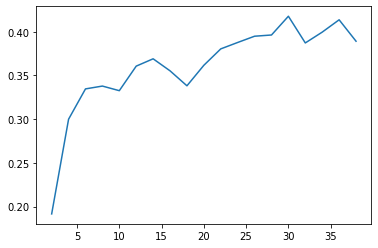

In [10]:
plt.plot(range(2, 40, 2), coh_dict['c_v'])


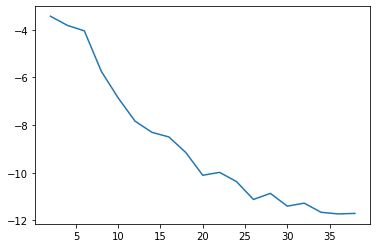

In [11]:
plt.plot(range(2, 40, 2), coh_dict['u_mass'])


In [12]:
# model_perplexities = []
# for num_topics in range(2, 40, 2):
#     lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=10, workers=4, alpha=0.01, eta=.91)
#     model_perplexities.append(lda_model.log_perplexity(corpus_tfidf))

In [13]:
# plt.plot(range(2, 40, 2), model_perplexities)